<a href="https://colab.research.google.com/github/cazarate09/Desaf-o_Telecom_X_2/blob/main/Desaf%C3%ADo_Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔨 **0. Preparación de los Datos**

## Llamado de las librerías básicas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extracción del Archivo Tratado

In [ ]:
datos_iniciales = pd.read_csv('/content/drive/MyDrive/telecomX.csv', sep = ',')
datos_iniciales.head(4)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,19.78
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,18.08
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,9.36
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,41.26


# 🔎 **1. Exploración de los Datos**

In [ ]:
datos_iniciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


## 1.1. Eliminación de Columnas Irrelevantes

La primera columna que se identifica como no relevante, dentro del conjunto de datos inicial, es *customerID* ya que únicamente se utiliza para identificar cada uno de los registros y no tiene incidencia directa sobre los demaás campos. La columna *Charges.Daily* es un cálculo que se realizó tomando como base el campo *Charges.Total* y no tiene relevancia.

In [ ]:
datos_iniciales.drop(columns=['customerID', 'Charges.Daily'], inplace=True)
datos_iniciales.sample(4)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4011,0,Female,1,0,0,18,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Credit card (automatic),49.85,865.75
671,0,Male,0,1,1,26,1,No,DSL,No,No,Yes,No,No,No,One year,0,Mailed check,50.35,1285.80
3125,0,Male,0,0,0,5,1,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,0,Electronic check,56.15,291.45
2049,1,Female,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer (automatic),20.20,20.20


## 1.2. Revisión de estadísticas para campos numéricos

In [ ]:
datos_iniciales.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000


## 1.3. Análisis de columnas categóricas

In [ ]:
datos_iniciales.describe(include = 'object')

,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,3,3,3,3,3,3,3,3,3,4
top,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


## 1.4. Cantidad y porcentaje de clientes que cancelaron y no cancelaron

In [ ]:
import warnings
warnings.filterwarnings('ignore')


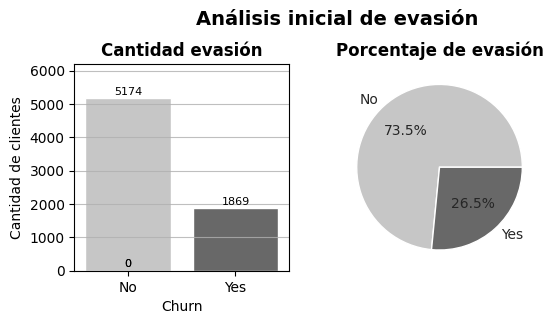

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (7, 3))
fig.suptitle('Análisis inicial de evasión', fontsize = 14, fontweight = 'bold')

sns.set_style('whitegrid')
barras = sns.barplot(
                      x = datos_iniciales['Churn'].value_counts().index,
                      y = datos_iniciales['Churn'].value_counts(),
                      palette='Greys',
                      hue = datos_iniciales['Churn'].value_counts().index,
                      ax = ax[0]
                     )
ax[0].set_title('Cantidad evasión', fontsize = 12, fontweight = 'bold', )
ax[0].set_xlabel("Churn")
ax[0].set_ylabel('Cantidad de clientes')
ax[0].grid(axis='y', linestyle='-', alpha=0.8)
ax[0].set_xticklabels(['No', 'Yes'])
ax[0].legend().remove()
ax[0].set_ylim(0, datos_iniciales['Churn'].value_counts().max() * 1.2)  # Aumenta el espacio superior
for p in barras.patches:
    ax[0].annotate(f'{int(p.get_height())}', # Formatear el valor como entero
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5), # Ajustar la posición vertical del texto
                     textcoords='offset points',
                     fontsize=8,
                     color='black')

##Gráfico de torta
porcentajes = round(datos_iniciales['Churn'].value_counts(normalize=True) * 100, 2)
ax[1].pie(
            porcentajes.values,
            labels= ['No', 'Yes'],
            autopct = '%1.1f%%',
            colors = sns.color_palette('Greys',n_colors=2)
          )
ax[1].set_title('Porcentaje de evasión', fontsize = 12, fontweight = 'bold')


plt.subplots_adjust(top=0.8, right=0.8)
plt.show()

Se observa que casi el 75 % del total de la base inicial corresponden a clientes que no han cancelsado el servicio, esto podría influir en los resultados de los modelos.

## 1.5. Relación Churn y variables categóricas

## Revisión de valores únicos en columnas categóricas (texto)

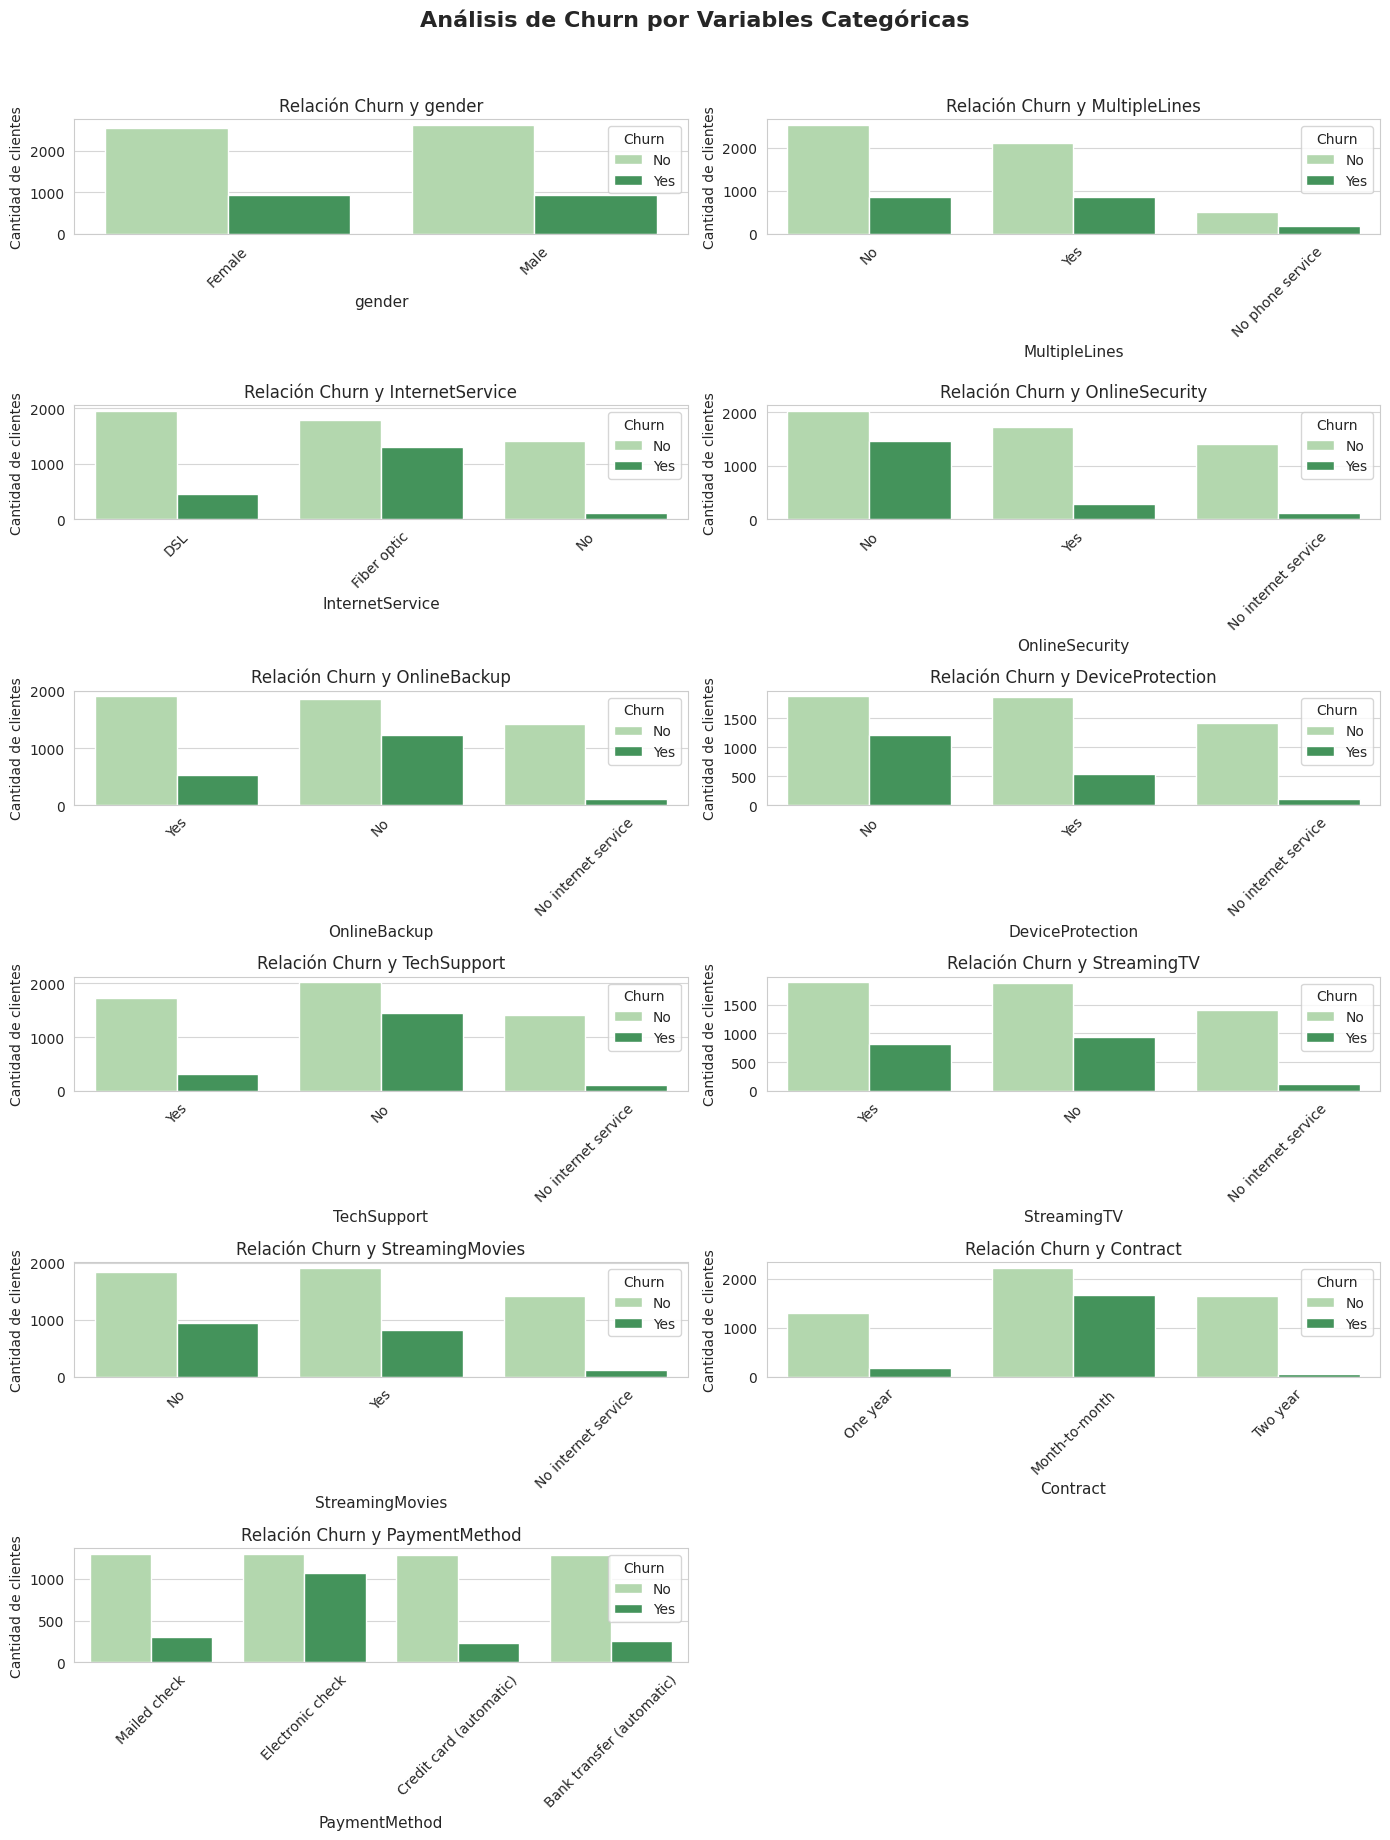

In [ ]:
columnas_categoricas = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',	'OnlineBackup',
                        'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',
                        'PaymentMethod']

numero_columnas = 2
numero_filas = (len(columnas_categoricas) + numero_columnas - 1) // numero_columnas # Ensure enough rows for all plots
fig, ax = plt.subplots(numero_filas, numero_columnas, figsize=(numero_columnas*7, numero_filas*3))
ax = ax.flatten()
plt.suptitle('Análisis de Churn por Variables Categóricas', fontsize=16, y=1.02, fontweight = 'bold')

for i, columna in enumerate(columnas_categoricas):
  if i < len(ax):

    sns.countplot(x=columna, hue='Churn', data = datos_iniciales, ax=ax[i], palette='Greens')
    ax[i].set_title(f'Relación Churn y {columna}', fontsize = 12)
    ax[i].set_xlabel(columna, fontsize = 11)
    ax[i].set_ylabel('Cantidad de clientes')
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].legend(title='Churn', labels=['No', 'Yes'])
    ax[i].grid(axis='y', linestyle='-', alpha=0.8)

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.subplots_adjust(top=1.2, right=0.8)
plt.tight_layout()
plt.show()

In [ ]:
columnas = datos_iniciales.columns
for columna in columnas:
  if datos_iniciales[columna].dtype == 'object':
    valores_unicos = datos_iniciales[columna].unique()
    print(f'Valores únicos en la columna {columna}: {valores_unicos}')

Valores únicos en la columna gender: ['Female' 'Male']
Valores únicos en la columna MultipleLines: ['No' 'Yes' 'No phone service']
Valores únicos en la columna InternetService: ['DSL' 'Fiber optic' 'No']
Valores únicos en la columna OnlineSecurity: ['No' 'Yes' 'No internet service']
Valores únicos en la columna OnlineBackup: ['Yes' 'No' 'No internet service']
Valores únicos en la columna DeviceProtection: ['No' 'Yes' 'No internet service']
Valores únicos en la columna TechSupport: ['Yes' 'No' 'No internet service']
Valores únicos en la columna StreamingTV: ['Yes' 'No' 'No internet service']
Valores únicos en la columna StreamingMovies: ['No' 'Yes' 'No internet service']
Valores únicos en la columna Contract: ['One year' 'Month-to-month' 'Two year']
Valores únicos en la columna PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


## 1.6. Relación Churn y variables numéricas

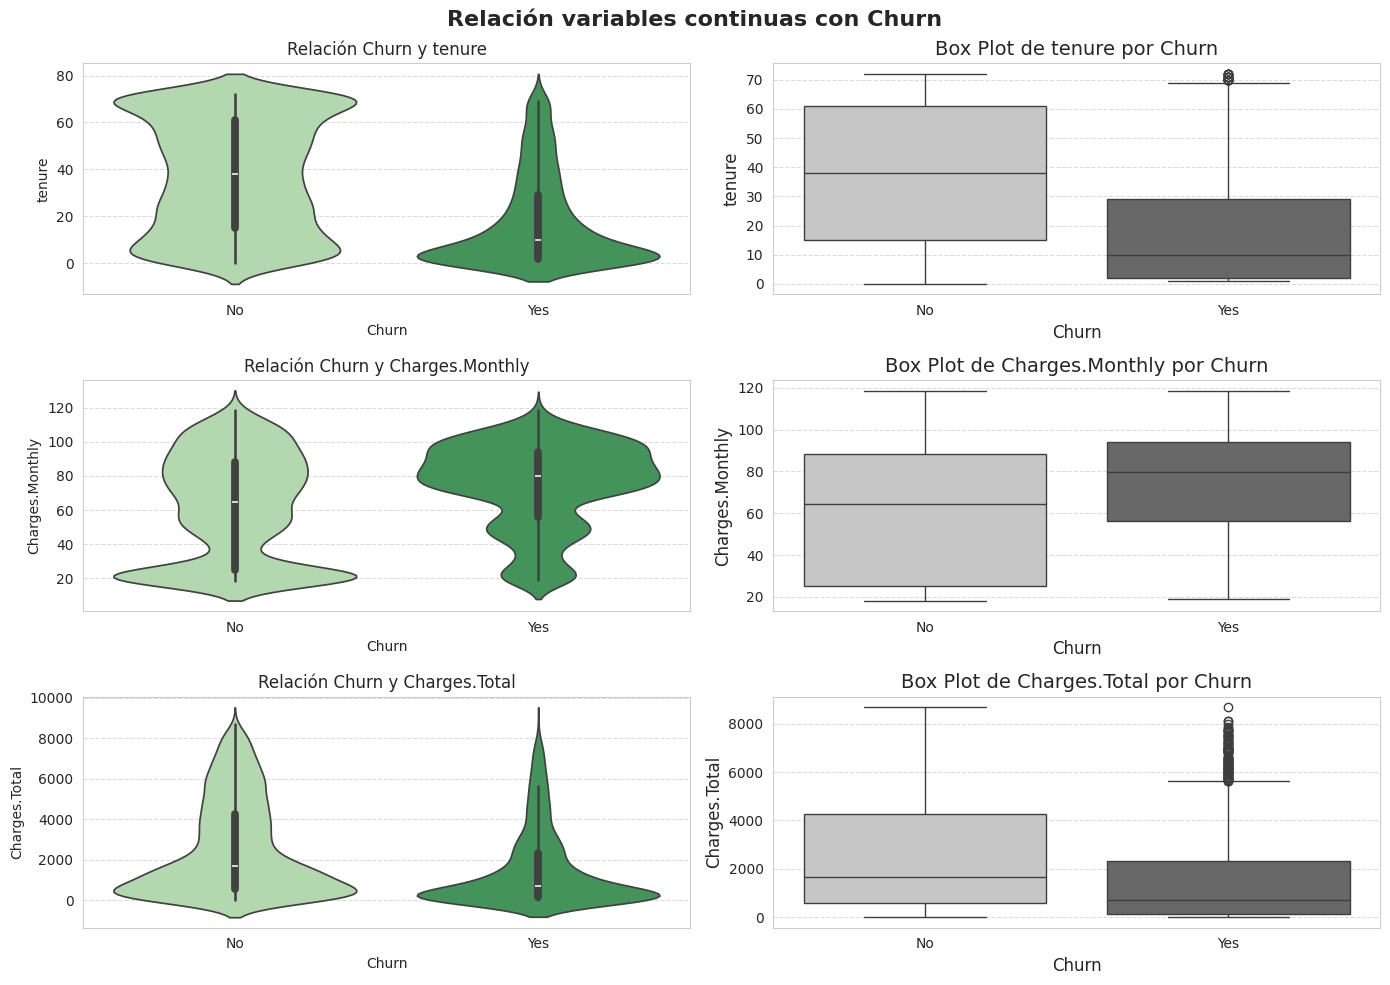

In [ ]:
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

fig, ax = plt.subplots(nrows=len(columnas_numericas), ncols= 2, figsize=(14, 10))

for i, columna in enumerate(columnas_numericas):
  sns.violinplot(data=datos_iniciales, x = 'Churn', y = columna, ax = ax[i, 0], hue ='Churn', palette='Greens')
  ax[i, 0].set_title(f'Relación Churn y {columna}', fontsize = 12)
  ax[i, 0].set_xlabel('Churn')
  ax[i, 0].set_ylabel(columna)
  ax[i, 0].tick_params(axis='x')
  ax[i, 0].grid(axis='y', linestyle='--', alpha=0.7)
  ax[i, 0].set_xticks([0, 1])
  ax[i, 0].set_xticklabels(['No', 'Yes'])
  ax[i, 0].legend().remove()

  sns.boxplot(data=datos_iniciales, x='Churn', y = columna, ax = ax[i, 1], hue = 'Churn', palette='Grays')
  ax[i, 1].set_title(f'Box Plot de {columna} por Churn', fontsize=14)
  ax[i, 1].set_xlabel('Churn', fontsize=12)
  ax[i, 1].set_ylabel(columna, fontsize=12)
  ax[i, 1].grid(axis='y', linestyle='--', alpha=0.7)
  ax[i, 1].set_xticks([0, 1])
  ax[i, 1].set_xticklabels(['No', 'Yes'])
  ax[i, 1].legend().remove()

plt.suptitle("Relación variables continuas con Churn", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=1.2, right=0.8)
plt.tight_layout()
plt.show()

# 🪒 **2. Transformación de los Datos**

## 2.1. Reemplazo de valor *No phone service* en campo *MultipleLines*

In [ ]:
datos_iniciales['MultipleLines'] = datos_iniciales['MultipleLines'].apply(lambda x: 'No' if x == 'No phone service' else x)

## 2.2.Reemplazo de valor *No internet service* en campos *OnlineSecurity*, *OnlineBackup*, *DeviceProtection*, *TechSupport*, *StreamingTV*, *StreamingMovies*

In [ ]:
for columna in columnas:
  datos_iniciales[columna] = datos_iniciales[columna].apply(lambda x: 'No' if x == 'No internet service' else x)

In [ ]:
for columna in columnas:
  if datos_iniciales[columna].dtype == 'object':
    valores_unicos = datos_iniciales[columna].unique()
    print(f'Valores únicos en la columna {columna}; {valores_unicos}')


Valores únicos en la columna gender; ['Female' 'Male']
Valores únicos en la columna MultipleLines; ['No' 'Yes']
Valores únicos en la columna InternetService; ['DSL' 'Fiber optic' 'No']
Valores únicos en la columna OnlineSecurity; ['No' 'Yes']
Valores únicos en la columna OnlineBackup; ['Yes' 'No']
Valores únicos en la columna DeviceProtection; ['No' 'Yes']
Valores únicos en la columna TechSupport; ['Yes' 'No']
Valores únicos en la columna StreamingTV; ['Yes' 'No']
Valores únicos en la columna StreamingMovies; ['No' 'Yes']
Valores únicos en la columna Contract; ['One year' 'Month-to-month' 'Two year']
Valores únicos en la columna PaymentMethod; ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


## 2.3. Cambio de los datos Yes -> 1 y No -> 0

In [ ]:
covertir_booleanas = ['MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [ ]:
for columna in covertir_booleanas:
  datos_iniciales[columna] = datos_iniciales[columna].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
datos_iniciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
booleanas = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

In [ ]:
datos_iniciales.sample(4)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
5640,0,Female,0,0,0,36,1,0,DSL,1,1,1,1,1,1,One year,0,Bank transfer (automatic),85.85,3003.55
6045,1,Male,0,0,0,24,1,1,Fiber optic,0,0,1,0,1,0,Month-to-month,1,Mailed check,89.85,2165.05
5262,0,Male,0,0,0,10,1,0,Fiber optic,1,0,1,0,0,0,Month-to-month,1,Mailed check,79.85,887.35
1457,0,Female,0,1,0,40,1,1,DSL,0,1,0,0,1,0,One year,0,Bank transfer (automatic),63.90,2635.00


## 2.4. Separación de variables explicativas y variable respuesta

In [ ]:
X = datos_iniciales.drop('Churn', axis=1)
y = datos_iniciales['Churn']

In [ ]:
X.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
182,Male,0,0,0,19,1,0,DSL,0,1,0,1,0,1,One year,1,Bank transfer (automatic),65.35,1231.85
3272,Male,1,1,0,50,1,1,Fiber optic,1,1,1,0,1,0,One year,1,Bank transfer (automatic),101.90,5265.50
189,Female,0,0,1,11,0,0,DSL,1,0,0,1,0,0,One year,1,Mailed check,36.05,402.60
2629,Male,0,1,0,36,0,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,35.35,1317.95


In [ ]:
y.sample(4)

,Churn
3466,1
2086,0
5926,0
6646,1


## 2.5. Tratamiento de variables categóricas restantes (Encoding)

In [ ]:

for columna in X.columns:
  if datos_iniciales[columna].dtype == 'object':
    valores_unicos = datos_iniciales[columna].unique()
    print(f'Valores únicos en la columna {columna}; {valores_unicos}')

Valores únicos en la columna gender; ['Female' 'Male']
Valores únicos en la columna InternetService; ['DSL' 'Fiber optic' 'No']
Valores únicos en la columna Contract; ['One year' 'Month-to-month' 'Two year']
Valores únicos en la columna PaymentMethod; ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


Se observa que la información almacenada en dichas variables contiene múltiples valores que no pueden clasificarse con un valor porque se estaría dando más relevancia a unos datos que a otros. En este caso debe realizarse proceso de *OneHotEncoder*.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer

In [ ]:
one_hot = make_column_transformer(
  (OneHotEncoder(drop='first'), ['gender', 'InternetService', 'Contract', 'PaymentMethod']),
  remainder='passthrough',
  sparse_threshold=0,
  force_int_remainder_cols=False
)

label_encoder = LabelEncoder()


In [ ]:
X_one_hot = one_hot.fit_transform(X)

In [ ]:
columnas_encoder = one_hot.get_feature_names_out(X.columns)

nombres_arreglados = []

for columna_encoder in columnas_encoder:
  columnas_encoder = columna_encoder.split('__')[1]
  nombres_arreglados.append(columnas_encoder)


In [ ]:
X_encoded = pd.DataFrame(X_one_hot, columns=nombres_arreglados)
X_encoded.sample(4)

,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Partner,...,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total
2266,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.05,264.55
2544,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,89.90,2806.90
1226,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,48.90,3527.00
6292,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,101.75,1669.40


## 2.6. Escalamiento - Normalización de los campos numéricos para Regresión Logística, Máquinas de Soporte Vectorial, Clustering

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizador = MinMaxScaler()

In [ ]:
X_numericas = X[['tenure', 'Charges.Monthly', 'Charges.Total']]

In [ ]:
X_numericas_normalizadas = normalizador.fit_transform(X_numericas)

In [ ]:
X_numericas_normalizadas = pd.DataFrame(X_numericas_normalizadas, columns=X_numericas.columns)
X_numericas_normalizadas = X_numericas_normalizadas.rename(columns={'tenure': 'tenure_norm', 'Charges.Monthly': 'Charges.Monthly_norm', 'Charges.Total': 'Charges.Total_norm' })
X_numericas_normalizadas.sample(4)

,tenure_norm,Charges.Monthly_norm,Charges.Total_norm
6653,0.347222,0.007960,0.053116
6246,0.111111,0.663682,0.076962
1305,0.680556,0.312438,0.277485
5030,0.916667,0.020896,0.156538


## 2.7. Se unen los campos escalados al dataframe X_encode

In [ ]:
X_encoded_normalizado = pd.concat([X_encoded, X_numericas_normalizadas], axis=1)
X_encoded_normalizado

,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Partner,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,tenure_norm,Charges.Monthly_norm,Charges.Total_norm
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,65.60,593.30,0.125000,0.471144,0.068315
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,59.90,542.40,0.125000,0.414428,0.062454
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,73.90,280.85,0.055556,0.553731,0.032338
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,0.180556,0.793532,0.142531
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,83.90,267.40,0.041667,0.653234,0.030789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,55.15,742.90,0.180556,0.367164,0.085540
7039,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,0.305556,0.665174,0.215745
7040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,50.30,92.75,0.027778,0.318905,0.010680
7041,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,0.930556,0.493532,0.532845


### 2.7.1 Unificación de X_encoded_normalizado y Y (Churn) para identificar relaciones

In [ ]:
y = pd.DataFrame(y, columns=['Churn'])
df_final = pd.concat([X_encoded_normalizado, y], axis=1)
df_final.sample(4)

,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Partner,...,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,tenure_norm,Charges.Monthly_norm,Charges.Total_norm,Churn
5185,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,98.10,396.30,0.055556,0.794527,0.045631,1
5772,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,101.50,906.85,0.125000,0.828358,0.104418,0
1958,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,108.05,7532.15,0.986111,0.893532,0.867280,1
3965,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,99.25,5846.65,0.805556,0.805970,0.673205,0


## 2.8. Matriz de correlacióncols = corr.loc['Churn'].abs()[corr.loc['Churn'].

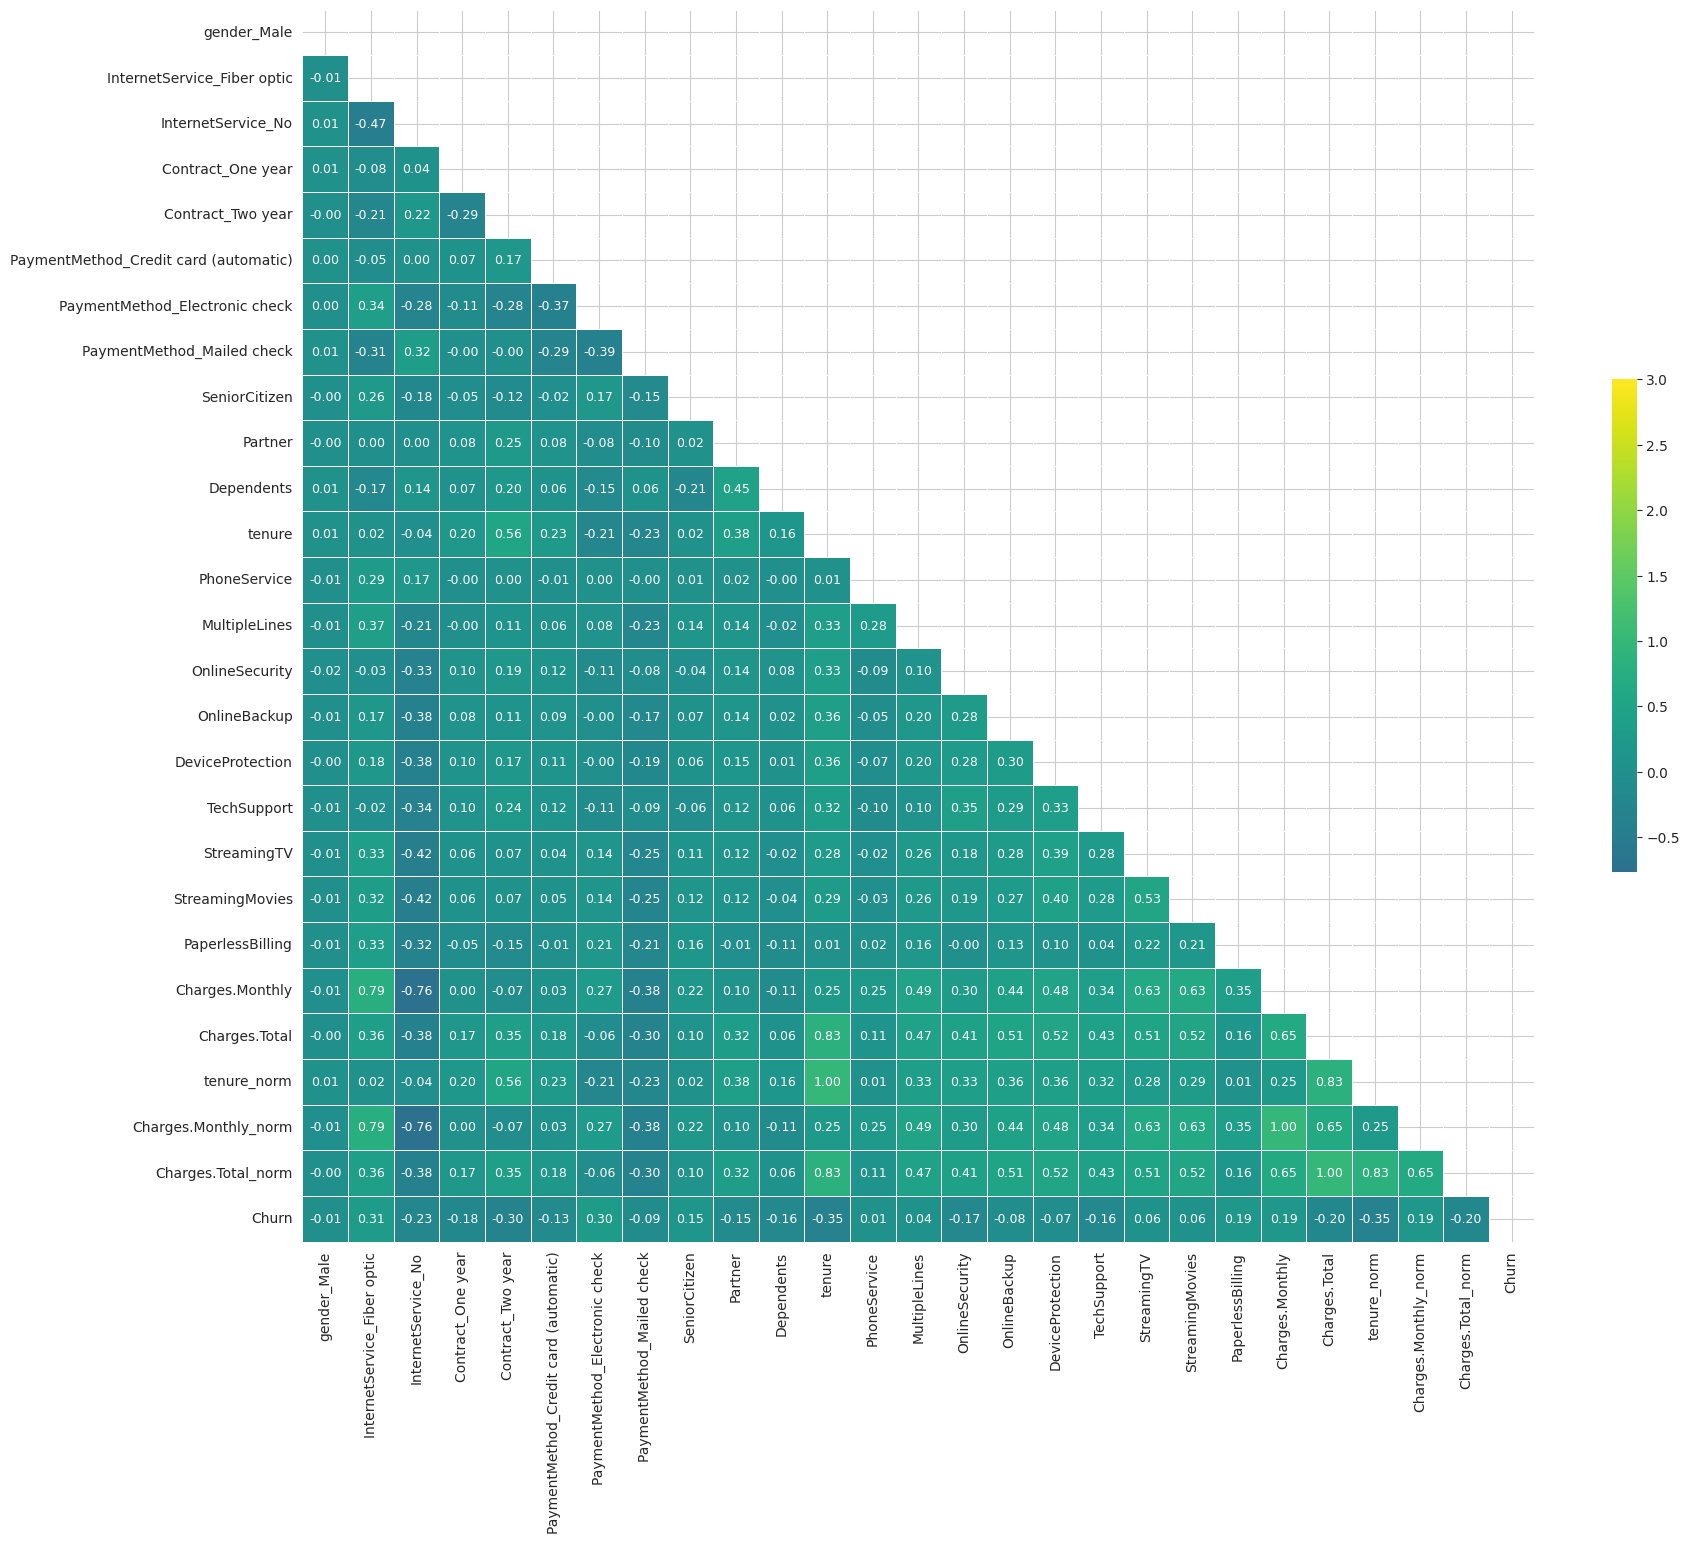

In [ ]:
corr_matriz = df_final.corr()



mascara = np.triu(np.ones_like(corr_matriz, dtype=bool))

fig, ax = plt.subplots(figsize = (20, 16))
sns.heatmap(corr_matriz, mask = mascara, cmap = 'viridis', annot=True, fmt='.2f',
            vmax=3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .4}, annot_kws={"fontsize":9})
plt.show()

## 2.9. Análisis de Multicolinealidad

Se debe calcular el valor del Factor de Inflación de Varianza (VIF). Tener un valor alto de este factor indica que una variable de entrada tiene una alta correlación con otras variables de entrada.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 2.9.1. Identificación de infinitos y nulos

In [ ]:
if np.isinf(df_final).any().any() or df_final.isnull().any().any():
    print("Hay infinitos y/o nulos en el DataFrame.")
else:
    print("No hay infinitos ni nulos en el DataFrame.")

No hay infinitos ni nulos en el DataFrame.


### 2.9.2. Se crea un dataframe VIF

In [ ]:
VIF_df = pd.DataFrame()
VIF_df['Features'] = df_final.columns

### 2.9.3. Calcular factor VIF para cada variable

In [ ]:
# Select only numerical columns for VIF calculation
df_numerical = df_final.select_dtypes(include=np.number)

VIF_df = pd.DataFrame()
VIF_df['Features'] = df_numerical.columns

VIF_df['VIF'] = [
                  variance_inflation_factor(df_numerical.values, i)
                  for i in range(len(df_numerical.columns))
                ]

display(VIF_df)

,Features,VIF
0,gender_Male,1.002157
1,InternetService_Fiber optic,148.342004
2,InternetService_No,104.256994
3,Contract_One year,1.635573
4,Contract_Two year,2.639233
5,PaymentMethod_Credit card (automatic),1.560766
6,PaymentMethod_Electronic check,1.983505
7,PaymentMethod_Mailed check,1.860579
8,SeniorCitizen,1.155267
9,Partner,1.462703


### 2.9.4. Eliminación de campos que están generando un VIF alto

De los resultados anteriores se concluye que los campos OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV y StreamingMovies que son dependientes de InternetSrvice son redundantes y generan valores altos. Asimismo MultipleLines que de depende de PhoneService.

Adicional a los anterior las columnas tenure, Charges.Monthly, Charges.Total y Charges.Total_norm causan redundancia con sus valores normalizados, por lo tanto, estos campos también deben suprimirse.

In [ ]:
df_final.drop(columns=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'tenure',
                       'Charges.Monthly', 'Charges.Total', 'Charges.Monthly_norm', 'Charges.Total_norm',
                       'PhoneService','Churn'], inplace=True)

In [ ]:
df_final.sample(4)

,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Partner,Dependents,PaperlessBilling,tenure_norm
2123,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.777778
272,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000
5339,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.250000
5539,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.597222


## 2.10. Nuevo análisis de Multicolinealidad

### 2.10.1. Identificación de infinitos y nulos

In [ ]:
if np.isinf(df_final).any().any() or df_final.isnull().any().any():
    print("Hay infinitos y/o nulos en el DataFrame.")
else:
    print("No hay infinitos ni nulos en el DataFrame.")

No hay infinitos ni nulos en el DataFrame.


### 2.10.2. Se crea un dataframe VIF

In [ ]:
VIF_df = pd.DataFrame()
VIF_df['Features'] = df_final.columns

### 2.10.3. Calcular factor VIF para cada variable

In [ ]:
# Select only numerical columns for VIF calculation
df_numerical = df_final.select_dtypes(include=np.number)

VIF_df = pd.DataFrame()
VIF_df['Features'] = df_numerical.columns

VIF_df['VIF'] = [
                  variance_inflation_factor(df_numerical.values, i)
                  for i in range(len(df_numerical.columns))
                ]

VIF_df.sort_values(by='VIF', ascending=False, inplace=True)
display(VIF_df)

,Features,VIF
12,tenure_norm,5.879699
4,Contract_Two year,3.225798
9,Partner,2.801052
11,PaperlessBilling,2.581310
1,InternetService_Fiber optic,2.492038
6,PaymentMethod_Electronic check,2.094671
10,Dependents,1.946628
3,Contract_One year,1.944250
0,gender_Male,1.876038
2,InternetService_No,1.665428


In [ ]:
df_final_normalizado = df_numerical.copy()
df_final_normalizado.sample(4)

,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Partner,Dependents,PaperlessBilling,tenure_norm
6969,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.111111
964,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.097222
5321,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.166667
6687,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.819444


## 2.11. Seperación datos de entrenamiento, validación y prueba del conjunto normalizado

In [ ]:
from sklearn.model_selection import train_test_split

### 2.11.1. División de datos 80% entrenamiento / validación y 20% para pruebas

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(df_final_normalizado, y, test_size=0.2, random_state=42, stratify=y)

### 2.11.2. División de datos de entrenamiento / validacion 75 / 25

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

## 2.12. Balanceo de los datos de entrenamiento del dataframe normalizado

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
nm3 = NearMiss(version=3, n_neighbors_ver3=3)

In [ ]:
X_res, y_res = nm3.fit_resample(X_train, y_train)

# 🧣 3. Creación de modelos con escalado de variables

## 🍀 3.1. Modelo de Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
                            classification_report, ConfusionMatrixDisplay

In [ ]:
modelo_regresion_logistica = LogisticRegression(solver='liblinear', random_state=42)
modelo_regresion_logistica.fit(X_res, y_res)

LogisticRegression(random_state=42, solver='liblinear')

El parámetro *solver = 'liblinear'* está optimizado para clasificación de datos binarios, como en este caso Churn 1 o 0

In [ ]:
y_predic_regresion_logistica = modelo_regresion_logistica.predict(X_val)

### 3.1.1. Matriz de confusión y métricas modelo de regresión logística

Matriz de Confusión Regresión Logística:
[[842 193]
 [138 236]]


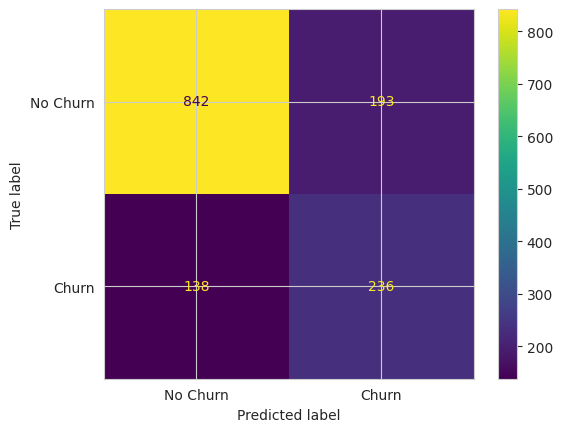

In [ ]:
matriz_confusion_RL = confusion_matrix(y_val, y_predic_regresion_logistica)
print("Matriz de Confusión Regresión Logística:")
print(matriz_confusion_RL)

visualizacion_matriz_RL = ConfusionMatrixDisplay(matriz_confusion_RL, display_labels=['No Churn', 'Churn'])
visualizacion_matriz_RL.plot();


### 3.1.2 Interpretación resultados modelo Regresión Lineal

*   **Verdaderos negativos (TN)**: El modelo inicial predijo correctamente que 842 clientes **No abandonarían**.

*   **Falsos positivos (FP)**: el modelo predijo de forma incorrecta que 193 **abandonarían** pero que en realiad **no abandonaron**.

*   **Falsos negativos (FN)**: el modelo predijo que 138 clientes **no abandonarían** pero en realidas **sí abandonaron**.

*   **Verdaderos positivos (TP)**: el modelo predijo, de forma correcta, que 236 clientes que abandonaron.
---

In [ ]:
print("Exactitud (Accuracy):", accuracy_score(y_val, y_predic_regresion_logistica))
#print("\nMatriz de Confusión:")
#print(confusion_matrix(y_test, y_predic_regresion_logistica))
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_predic_regresion_logistica))

Exactitud (Accuracy): 0.7650816181689141

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1035
           1       0.55      0.63      0.59       374

    accuracy                           0.77      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409



### 3.1.3 Interpretación métricas modelo Regresión Lineal

**Precisión**

*   **No Churn**: el 86 % de las veces el modelo predijo de forma correcta que un cliente **no abandonaría**.

*   **Churn**: el 55 % de las veces el modelo predijo de forma correcta que un cliente **abandonaría** pero se equivoca el 45 %, casi la mitad de las veces. Este tipo de comportamiento puede ocasionar que se lleven a cabo acciones para retener clientes que no han considerado abandonar la compañía.

---


**Sensibilidad (Recall)**

* **No Churn**: 81 % de las veces identificó de forma correcta clientes que **no abandonaron**

* **Churn**: identificó correctamente 63 % de clientes que **realmente abandonaron** la compañía.

---


**F1-score**

Promedio ponderado entre la precisión y la sensu¿ibilidad.

* **No Churn**: 84 %

* **Chrun**: 59 %

---

**Exactitud (Accuracy)**

En general la exactitud del modelo fue de 77 % al usar el conjunto de validación.




### 3.1.4 Reumen modelo de Regresión Logística

En términos de exactitud general del modelo se comporta de forma aceptable, por otro lado y teniendo en cuenta que **el objetivo es identificas a los clientes que abandonarían** la compañía, el modelo presenta un buen nivel de sensibilidad 63 % pero la exactitud se ve afectada 55 %.

Por lo tanto y teniendo en cuenta que el modelo de Regeresión Logística es el primero que se evalúa se hará uso de otros modelos para tratar de encontrar uno que mejore la sensibilidad y la precisión.

## 🔽 3.2 Modelo de Regresión Logísitca (umbral 0.4)

In [ ]:
y_pred_proba = modelo_regresion_logistica.predict_proba(X_val)[::, 1]

El método predict_proba() de un modelo de regresión logística no devuelve una clasificación binaria (0 o 1) directamente. En su lugar, produce la probabilidad de que cada instancia (cada cliente) pertenezca a cada clase.

El modelo usa estas probabilidades para hacer una clasificación final. Por defecto, si la probabilidad es mayor a 0.5, clasifica al cliente como Churn=1. Si la probabilidad es menor o igual a 0.5, lo clasifica como Churn=0.

### 3.2.1 Definiendo nuevo umbral

In [ ]:
nuevo_umbral = 0.4

In [ ]:
y_predic_regresion_logistica_ajustada = (y_pred_proba >= nuevo_umbral).astype(int)

### 3.2.2 Resultados métricas con umbral  modificado

Matriz de Confusión Regresión Logística umbral 0.4:
[[687 348]
 [ 76 298]]


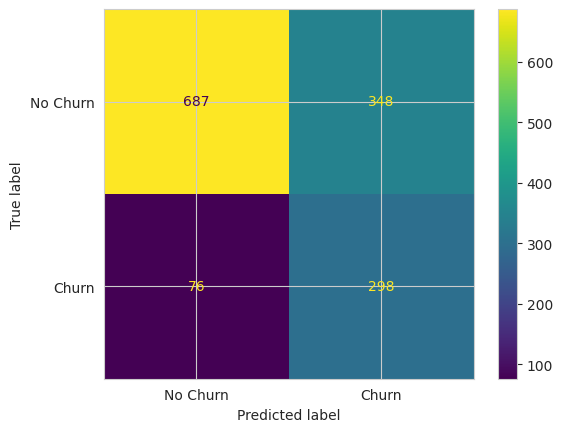

In [ ]:
matriz_confusion_RL = confusion_matrix(y_val, y_predic_regresion_logistica_ajustada)
print("Matriz de Confusión Regresión Logística umbral 0.4:")
print(matriz_confusion_RL)

visualizacion_matriz_RL = ConfusionMatrixDisplay(matriz_confusion_RL, display_labels=['No Churn', 'Churn'])
visualizacion_matriz_RL.plot();


In [ ]:
print("Exactitud (Accuracy):", accuracy_score(y_val, y_predic_regresion_logistica_ajustada))
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_predic_regresion_logistica_ajustada))

Exactitud (Accuracy): 0.6990773598296665

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1035
           1       0.46      0.80      0.58       374

    accuracy                           0.70      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.78      0.70      0.72      1409



Al modificar el umbral (0.4) mejora el recall de los clientes que abandonarían a 80 % pero la precisión se disminuye notablemente de 55 % a 46 % haciendo que el modelo de regresión logística con el umbral original siga siendo la mejor opción.

  


## 🎰 3.3 Modelo Máquinas de Soporte Vectorial (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
modelo_SVC = SVC(kernel='linear', random_state=42)
modelo_SVC.fit(X_res, y_res)

SVC(kernel='linear', random_state=42)

In [ ]:
y_predic_SVC = modelo_SVC.predict(X_val)

Matriz de Confusión Máquinas de Soporte Vectorial:
[[846 189]
 [140 234]]


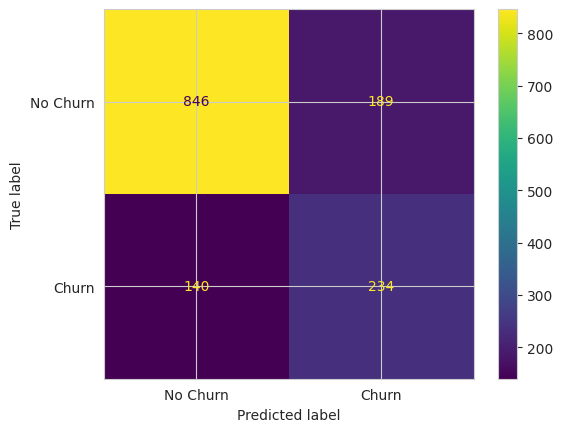

In [ ]:
matriz_confusion_SVC = confusion_matrix(y_val, y_predic_SVC)
print("Matriz de Confusión Máquinas de Soporte Vectorial:")
print(matriz_confusion_SVC)

visualizacion_matriz_SVC = ConfusionMatrixDisplay(matriz_confusion_SVC, display_labels=['No Churn', 'Churn'])
visualizacion_matriz_SVC.plot();

In [ ]:
print("Exactitud (Accuracy):", accuracy_score(y_val, y_predic_SVC))
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_predic_SVC))

Exactitud (Accuracy): 0.7665010645848119

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.55      0.63      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409



Los resultados del modelo de Máquinas de Soporte Vectorial utilizando kernel lineal son exactamente iguales al modelo de Regresión Logística, se hara ajuste de los hiperparámetros usando GridSearchCV para optimizar los resultados.

### 3.3.1 Uso de GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
modelo_SVC_grid = SVC(random_state=42)

### 3.3.2 Definición de parámetros a buscar

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'gamma': [0.001, 0.01, 0.1, 1], # Parámetro del kernel 'rbf'
    'kernel': ['rbf']
}

### 3.3.3 Creación de instancia CV y entrenamiento

In [ ]:
grid_search = GridSearchCV(modelo_SVC_grid, param_grid, cv=5, scoring='recall', verbose=2, n_jobs=1)

In [ ]:
grid_search.fit(X_res, y_res)
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (recall):", grid_search.best_score_)
best_svm_model = grid_search.best_estimator_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1

### 3.3.4 Predicciones con los mejores parámetros

In [ ]:
y_predic_SVC_best = best_svm_model.predict(X_val)

In [ ]:
print("Exactitud (Accuracy):", accuracy_score(y_val, y_predic_SVC_best))
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_predic_SVC))

Exactitud (Accuracy): 0.7054648687012065

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.55      0.63      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409



No existe mejoría en los resultados obtenidos al usar el modelos de Máquinas de Soporte Vectorial.

## 🏗 3.4 K-Vecinos Cercanos (K-NN)

El hiperparámetro más importante del modelo de vecinos cercanos es el número de vecinos a considerar *(k)* y se usará un bucle para encontrar el mejor valor.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### 3.4.1 Determinación de k

In [ ]:
k_range = range(1, 101)
scores = {}
best_k = 0
best_accurancy = 0

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_res, y_res)
  y_pred_KNN = knn.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred_KNN)
  scores[k] = accuracy
  if accuracy > best_accurancy:
    best_accurancy = accuracy
    best_k = k

print(f'El mejor valor de k es {best_k} con una precisión de {best_accurancy}')

El mejor valor de k es 14 con una precisión de 0.765791341376863


### 3.4.2 Entrenamiento del moelo con el mejor k

In [ ]:
modelo_knn_best = KNeighborsClassifier(n_neighbors = best_k)
modelo_knn_best.fit(X_res, y_res)
y_predic_KNN = modelo_knn_best.predict(X_val)

### 3.4.3 Métricas de evaluación KNN

In [ ]:
print("Exactitud (Accuracy):", accuracy_score(y_val, y_predic_KNN))
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_predic_KNN))

Exactitud (Accuracy): 0.765791341376863

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1035
           1       0.56      0.52      0.54       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409



A pesar de identificar el mejor k se observa que la sensibilidad (recall) de los cloientes que abandonarían 52 % no supera a la sensibilidad obtenida con el modelo de regresión logística (63 %), por lo tanto este último odelo mencionado sigue siendo mejor.

## 🕸 3.5 Modelo de Redes Neuronales Perceptrón Multicapa (MLP)

---



Estos modelos se basan en capas de neuronas interconectadas.

In [ ]:
from sklearn.neural_network import MLPClassifier

### 3.5.1 Creación de la instancia de la Red Neuronal

*   Capa oculta de 100 neuronas
*   Max_iter es el número máximo de iteraciones durante el entrenamiento del modelo



In [ ]:
modelo_MLP = MLPClassifier(hidden_layer_sizes=100, max_iter=300, random_state=42)

In [ ]:
modelo_MLP.fit(X_res, y_res)

MLPClassifier(hidden_layer_sizes=100, max_iter=300, random_state=42)

In [ ]:
y_predic_MLP = modelo_MLP.predict(X_val)

### 3.5.2 Métricas de evaluación Red Neuronal MLP

In [ ]:
print("Exactitud (Accuracy):", accuracy_score(y_val, y_predic_MLP))
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_predic_MLP))

Exactitud (Accuracy): 0.7480482611781405

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1035
           1       0.52      0.59      0.55       374

    accuracy                           0.75      1409
   macro avg       0.68      0.70      0.69      1409
weighted avg       0.76      0.75      0.75      1409



La red neuronal básica no mejora el recall de los clientes que abandonarían, se obtuvo 59 % que es inferior al 63 % del modelo de regresión logística.

## Ⓜ 3.6 Modelo de Redes Neuronales Perceptrón Multicapa (MLP) GridSearchCV

### 3.6.1 Definición de parámetros a buscar

In [ ]:
param_grid ={
    'hidden_layer_sizes': [(50,), (100), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

### 3.6.2 Creación de la instancia de la red neuronal

In [ ]:
modelo_MLP_grid = MLPClassifier(max_iter=300, random_state=42)

### 3.6.3 Creación de la instancia GridSearchCV

In [ ]:
grid_search = GridSearchCV(modelo_MLP_grid, param_grid, cv=5, scoring='recall', verbose=2, n_jobs=1)

### 3.6.4 Entrenamiento de GridSearchCV

In [ ]:
grid_search.fit(X_res, y_res)
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (recall):", grid_search.best_score_)
best_mlp_model = grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=lbfgs; total time=   6.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=lbfgs; total time=   6.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), le

In [ ]:
y_predic_MLP_nest = best_mlp_model.predict(X_val)

3.6.5 Métricas de evaluación Red Neuronal MLP Best

In [ ]:
print("Exactitud (Accuracy):", accuracy_score(y_val, y_predic_MLP_nest))
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_predic_MLP_nest))

Exactitud (Accuracy): 0.7665010645848119

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1035
           1       0.55      0.63      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409



La modificación de parámtros en la red neuronal hace que este modelo obtenga los mismo resultados de sensibilidad 63 % y de precsión 55 % del modelo de regresión logística.

## 🪕 3.7 Modelo XGBoost



Esta clase de modelo construye una secuencia de árboles de decisión, cada árbol corrige los errores de los árboles anteriores

In [ ]:
from xgboost import XGBClassifier

### 3.7.1 Creación de la instancia del modelo

In [ ]:
modelo_XGB = XGBClassifier(objective = 'binary:logistic', eval_metric = 'logloss', use_label_encoder = False,
                           n_estimators = 100, learning_rate = 0.1, random_state=42)

### 3.7.2 Entrenamiento del modelo

In [ ]:
modelo_XGB.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_predic_XGB = modelo_XGB.predict(X_val)

### 3.7.3 Métricas de evaluación XGB


In [ ]:
print("Exactitud (Accuracy):", accuracy_score(y_val, y_predic_XGB))
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_predic_XGB))

Exactitud (Accuracy): 0.7480482611781405

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1035
           1       0.52      0.60      0.56       374

    accuracy                           0.75      1409
   macro avg       0.68      0.70      0.69      1409
weighted avg       0.76      0.75      0.75      1409



Los resultados del modelo del descenso del gradiente muestran una sensibilidad de 60 % y una precisión de 52 % para posibles abandonos, estos no suprean los obtenidos con la regresión logística.  

## ⛽ 3.8 Modelo XGB GridSearchCV

### 3.8.1 Definición de parámetros a buscar

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

### 3.8.2 Crear la instancia del modelo

In [ ]:
modelo_XGB_grid = XGBClassifier(objective = 'binary:logistic', eval_metric = 'logloss', use_label_encoder = False,
                                random_state=42)

### 3.8.3 Creacion instancia GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator = modelo_XGB_grid, param_grid = param_grid, cv = 5, scoring='recall', verbose=2, n_jobs=1)

### 3.8.4 Entrenamiento de GridSearchCV

In [ ]:
grid_search.fit(X_res, y_res)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END colsamp

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='recall', verbose=2)

In [ ]:
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (recall):", grid_search.best_score_)
best_xgb_model = grid_search.best_estimator_

Mejores parámetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Mejor puntuación (recall): 0.6253730158730159


### 3.8.5 Métricas modelo XGB con mejores parámetros

In [ ]:
y_predic_XGB_best = best_xgb_model.predict(X_val)

print("Exactitud (Accuracy):", accuracy_score(y_val, y_predic_XGB_best))
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_predic_XGB_best))

Exactitud (Accuracy): 0.7452093683463449

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1035
           1       0.52      0.61      0.56       374

    accuracy                           0.75      1409
   macro avg       0.68      0.70      0.69      1409
weighted avg       0.76      0.75      0.75      1409



La sensibilidad 61 % y la precisión 52 % no logran superar los ontenidos con el modelo de regresión logística.

## 🌳 3.9 Modelo Árbol de Decisión

Este tipo de modelo puede ser propenso al sobreajuste.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### 3.9.1 Creación de instancia del modelo

In [ ]:
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=42)

### 3.9.2 Entrenamiento del modelo de árbol

In [ ]:
modelo_arbol.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_predic_arbol = modelo_arbol.predict(X_val)

### 3.9.3 Métricas de evaluación modelo de arbol de decisión

In [ ]:
print('Exactud (Accracy): ', accuracy_score(y_val, y_predic_arbol))
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_predic_arbol))

Exactud (Accracy):  0.7125621007806955

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1035
           1       0.47      0.63      0.54       374

    accuracy                           0.71      1409
   macro avg       0.66      0.69      0.66      1409
weighted avg       0.75      0.71      0.72      1409



La sensibilidad para los clientes que abandonarían con este modelo de árbol, iguala a la de la regresión logística pero su prexisión es inferior.

## 🪓 3.10 Modelo Árbol de Decisión con GridSearchCV

### 3.10.1 Definción de los parámetros a buscar

In [ ]:
param_grid = {
    'max_depth': [None, 3, 5, 10, 15],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [2, 5, 10, 20]
}

### 3.10.2 Creación de la instacia del modelo

In [ ]:
modelo_arbol_grid = DecisionTreeClassifier(random_state=42)

### 3.10.3 Creación de la instancia de GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=modelo_arbol_grid, param_grid=param_grid, cv=5, scoring='recall', verbose=2, n_jobs=1)

### 3.10.4 Entrenamiento del modelo con GridSearchCV

In [ ]:
grid_search.fit(X_res, y_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 3, 5, 10, 15],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [1, 2, 5, 10]},
             scoring='recall', verbose=2)

In [ ]:
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (recall):", grid_search.best_score_)

Mejores parámetros encontrados: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor puntuación (recall): 0.6200793650793651


### 3.10.5 Métricas de evaluación modelo de árbol - GridSearchCV

In [ ]:
y_predic_arbol_best = grid_search.predict(X_val)
print('Exactitud (Accuracy): ', accuracy_score(y_val, y_predic_arbol_best))
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_predic_arbol_best))

Exactitud (Accuracy):  0.751596877217885

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1035
           1       0.53      0.67      0.59       374

    accuracy                           0.75      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.75      0.76      1409



La sensibilidad del modelo de árbol con los mejores parámetros supera a la sensibilidad del modelo de regresión logísitica pero la precisión está dos puntos por debajo.

## 🌲 3.11 Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Este tipo de modelo combina varios árbolres de decisión que trabajan de forma independiente y aleatoria; luego se promedian sus predicciones.

### 3.11.1 Creación de la instnacia del modelo

In [ ]:
moedelo_random = RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state=42)

### 3.11.2 Entrenamiento del modelo random forest

In [ ]:
moedelo_random.fit(X_res, y_res)

RandomForestClassifier(max_depth=5, random_state=42)

### 3.11.3 Métricas de evaluación modelo random forest

In [ ]:
y_predic_random = moedelo_random.predict(X_val)
print('Exactitud (Accuracy) :', accuracy_score(y_val, y_predic_random))
print('\Reporte de Clasificación')
print(classification_report(y_val, y_predic_random))


Exactitud (Accuracy) : 0.7757274662881476
\Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1035
           1       0.57      0.61      0.59       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



Con el modelo Random Forest, uitilizando los parámetos básico no se observa una mejoría en la sensibilidad (61 %) para determinar a los clientes que abandonarían.

## 🖖 3.12 Modelo Random Forest con GridSearchCV

### 3.12.1 Definción de los par+ametros a buscar

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

### 3.12.2 Creación de la instancia del modelo

In [ ]:
modelo_random_grid = RandomForestClassifier(random_state=42)

### 3.12.3 Creación de la instancia GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator = modelo_random_grid, param_grid = param_grid, cv = 5 , scoring='recall', verbose=2, n_jobs=1)

### 3.12.4 Entrenamiento del modelo con Grid SearchCV

In [ ]:
grid_search.fit(X_res, y_res)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_d

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=2)

In [ ]:
print('Mejores parámetros encontrados ', grid_search.best_params_)
print('Mejor puntuación (recall): ', grid_search.best_score_)

Mejores parámetros encontrados  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}
Mejor puntuación (recall):  0.6441230158730158


### 3.12.5 Métricas de evaluación modelo de Random Forest - GridSearchCV

In [ ]:
y_predic_random_best = grid_search.predict(X_val)
print('Exactitud (Accuracy) :', accuracy_score(y_val, y_predic_random_best))
print('\Reporte de Clasificación')
print(classification_report(y_val, y_predic_random_best))

Exactitud (Accuracy) : 0.772888573456352
\Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.56      0.63      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409



El modelo Random Forest con los mejores parámetros iguala el 63 % de sensibilidad obtenido con el modelo de Regresión Logística, sin embargo, lo supera con 56 % de presición.

In [ ]:
modelor = RandomForestClassifier(max_depth = 3, n_estimators = 100, min_samples_leaf=5, min_samples_split=20, random_state=42)
modelor.fit(X_res, y_res)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=20,
                       random_state=42)

## 4. Serialización mejor modelo

In [ ]:
import pickle

In [ ]:
try:
  with open('champion.pkl', 'wb') as file:
    pickle.dump(modelor, file)
  print('Modelo serializado con éxito')
except Exception as e:
  print(f'Error al serializar el modelo: {str(e)}')

Modelo serializado con éxito


Teniendo en cuenta que el modelo Random Forest con los parámetros 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100 presenta las mejores métricas, se serializa el modelo para ejecutarlo en entrono de producción.

## 🎟 5. Creación Pipeline con el mejor modelo

Teniendo en cuenta que el modelo Random Forest con los parámetros *'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100* presenta las mejores métricas, se crea el Pipeline con dicho modelo.

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

### 5.1 Generación de sobremuestro con SMOTE

In [ ]:
pipeline_smote = imbPipeline(
    steps=[
            ('sampling', SMOTE(random_state = 42)),
            ('classifier', RandomForestClassifier(max_depth = 3, n_estimators = 100, min_samples_leaf=5,
                                                  min_samples_split=20, random_state=42))
    ]
)

In [ ]:
pipeline_smote.fit(X_train, y_train)


Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=3, min_samples_leaf=5,
                                        min_samples_split=20,
                                        random_state=42))])

## 📐 6. Evaluación del modelo

In [ ]:
try:
  with open('champion.pkl', 'rb') as file:
    modelo_cargado = pickle.load(file)
  print('Modelo cargado con éxito')
except Exception as e:
  print(f'Se presentó un error al cargar el modelo: {str(e)}')

Modelo cargado con éxito


In [ ]:
y_predic_pipeline = modelo_cargado.predict(X_test)

--- Evaluación del Pipeline con Random Forest ---
Exactitud (Accuracy): 0.7693399574166075

Matriz de Confusión:
[[850 185]
 [140 234]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.56      0.63      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409



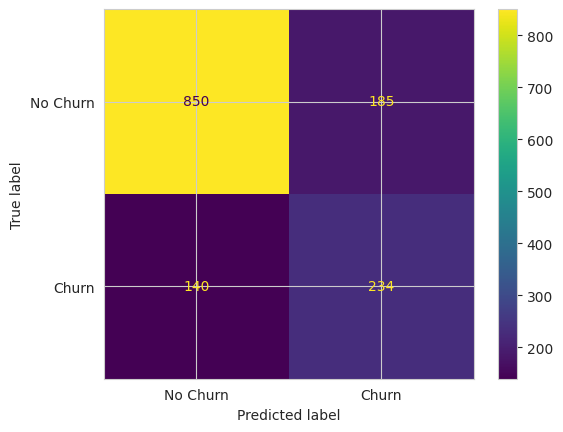

In [ ]:
print("--- Evaluación del Pipeline con Random Forest ---")
print("Exactitud (Accuracy):", accuracy_score(y_test, y_predic_pipeline))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_predic_pipeline))
x_visualizacion_matriz = ConfusionMatrixDisplay(confusion_matrix(y_test, y_predic_pipeline), display_labels=['No Churn', 'Churn'])
x_visualizacion_matriz.plot();
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_predic_pipeline))

## 👋 7. Conclusiones

**Punto Fuerte**: El modelo es efectivo para identificar a los clientes en riesgo, ya que tiene una sensibilidad del 63%. Esto significa que se puede usar para enfocar las estrategias de retención en más de la mitad de los clientes que están a punto de irse.

**Punto de Mejora**: La precisión del 56% significa que todavía se tiene un número considerable de falsos positivos (185 clientes). Esto se puede traducir en costos adicionales si, por ejemplo, e ofrecen descuentos a clientes que de todos modos se iban a quedar. Sin embargo, el costo de un falso negativo suele ser más alto que el de un falso positivo.

## ♊ **Realizado por Carlos Zárate**